## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Oct. 16, 2018 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

# Imports

In [102]:
# normal imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# cleaning imports
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, RobustScaler
# model imports
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, ElasticNet, Lasso,  BayesianRidge, SGDRegressor
import xgboost
#import lightgbm
# validation imports
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Load in data and visualize

In [3]:
# Load in training data
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
# Check what features we have
training_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# visualize the test data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# visualize training data, it includes sale price
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Save the 'Id' column
train_ID = training_data['Id']
test_ID = test_data['Id']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
training_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


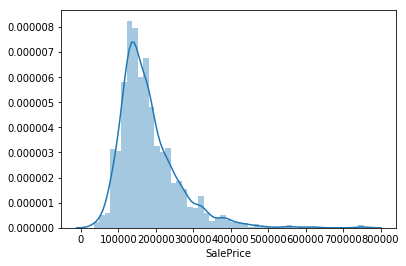

In [8]:
# lets look at sale price specifically
sns.distplot(training_data['SalePrice'])

In [9]:
print("Min:",training_data['SalePrice'].min())
print("Max:",training_data['SalePrice'].max())

Min: 34900
Max: 755000


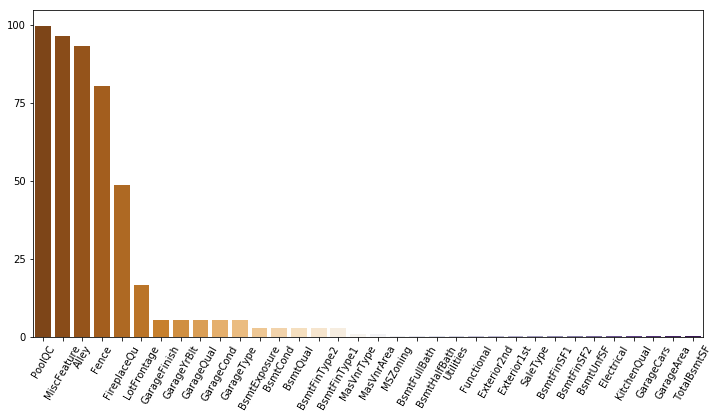

In [10]:
# lets look at all of our data and see what things are missing completely
# put both test and training data together
all_ = pd.concat((training_data.drop(["SalePrice"], axis=1), test_data))
# get percentage of column that's null
all_na = (all_.isnull().sum() / len(all_)) * 100
# drop columns where all values are present and nothing needs to be done
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
# visualize barplot using seaborn
plt.figure(figsize=(12, 6)) # figsize determines the window size of the graph
plt.xticks(rotation="60")
plt.yticks([0,25,50,75,100])
sns.barplot(x=all_na.index, y=all_na, palette="PuOr")

## Now that we've got an idea of what's going on we need to clean it

In [11]:
# we see that there are two ways to evaluate the pool, one being the poolQC and other being poolArea, 
# thus we're gonna drop poolQC as redundance
training_data = training_data.drop("PoolQC", axis=1)
test_data = test_data.drop("PoolQC", axis=1)

In [12]:
# what the heck is MiscFeature
training_data["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [13]:
# looks like I just wanna set NA's to "None" for get dummies to work right
training_data = training_data.fillna({"MiscFeature":"None"})
training_data["MiscFeature"].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [14]:
# whats happening with Alley
training_data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [15]:
# yeah... I don't think i care. lets drop Alley
training_data = training_data.drop("Alley", axis=1)
test_data = test_data.drop("Alley", axis=1)

In [16]:
# now for fence
training_data["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [17]:
# not gonna be enough info here to care
training_data = training_data.drop("Fence", axis=1)
test_data = test_data.drop("Fence", axis=1)

In [18]:
# And last big one is FireplaceQu
training_data["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [19]:
# oh well
training_data = training_data.drop("FireplaceQu", axis=1)
test_data = test_data.drop("FireplaceQu", axis=1)

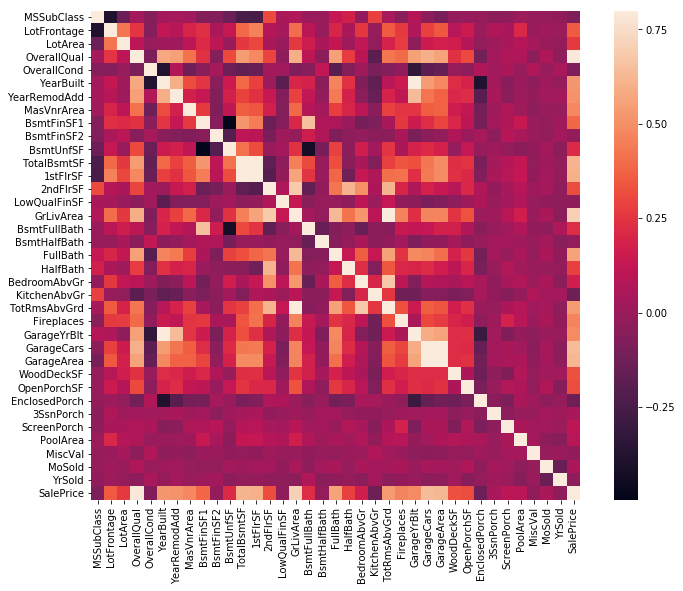

In [20]:
# lets see a correlation map between our different variables
corrmat = training_data.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [21]:
# let's create a single dataset with all of the observations
all_data = pd.concat((training_data.loc[:,'MSSubClass':'SaleCondition'],
                      test_data.loc[:,'MSSubClass':'SaleCondition']))

In [22]:
# we then need to log our sale price
training_data["SalePrice"] = np.log1p(training_data["SalePrice"])

In [23]:
# log transform skewed numeric features:
# Get numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Find which ones are skewed
skewed_feats = training_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
# Log the skewed features
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log1p
  if __name__ == '__main__':


In [24]:
# get dummies to deal with categorical features
all_data = pd.get_dummies(all_data)

In [25]:
# make life easy and just fill nan's with the mean of the column
all_data = all_data.fillna(all_data.mean())

In [26]:
# now lets get the training data and test data split up again
X_train = all_data[:training_data.shape[0]]
X_test = all_data[training_data.shape[0]:]
y = training_data.SalePrice

# Models

In [27]:
# helper function I found online
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [28]:
# Another validation function I found online
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [71]:
# scoring funciton I want for testing my ensembling
def score_it(predictions, ys):
    mse = mean_squared_error(ys, predictions)
    print("RMSE: {}".format(np.sqrt(mse)))

In [29]:
# Scale everything
scaler = StandardScaler()
scaler.fit(X_train)
scaled_df = scaler.transform(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [30]:
# simple linear model
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, y)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 450.3205952647236


In [31]:
# Ridge model, just found it was a thing and wanted to try it
ridge_model = Ridge()
ridge_model.fit(scaled_df,y)
ridge_predictions = ridge_model.predict(scaled_df)
ridge_mse = mean_squared_error(y, ridge_predictions)
print("RMSE: {}".format(np.sqrt(ridge_mse)))

RMSE: 0.09236724206720573


In [90]:
# Lets do a lasso
lcv_model = LassoCV()
lcv_model.fit(scaled_df,y)
lcv_predictions = lcv_model.predict(scaled_df)
lcv_mse = mean_squared_error(y, lcv_predictions)
print("RMSE: {}".format(np.sqrt(lcv_mse)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RMSE: 0.10003181763775038


In [107]:
extra_model = ExtraTreesRegressor()
extra_model.fit(scaled_df,y)
extra_predictions = extra_model.predict(scaled_df)
extra_mse = mean_squared_error(y, extra_predictions)
print("RMSE: {}".format(np.sqrt(extra_mse)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.3332634647908893e-05


In [80]:
# Use a Lasso with Robust Scaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))
lasso.fit(scaled_df,y)
lasso_predictions = lasso.predict(scaled_df)
lasso_mse = mean_squared_error(y, lasso_predictions)
print("RMSE: {}".format(np.sqrt(lasso_mse)))

RMSE: 0.09395824985997771


In [34]:
# Use Elastic Net
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9))
ENet.fit(scaled_df,y)
ENet_predictions = ENet.predict(scaled_df)
ENet_mse = mean_squared_error(y, ENet_predictions)
print("RMSE: {}".format(np.sqrt(ENet_mse)))

RMSE: 0.09382081330701235


In [35]:
# Use Random Forest Regressor
Rando = RandomForestRegressor()
Rando.fit(scaled_df,y)
Rando_predictions = Rando.predict(scaled_df)
Rando_mse = mean_squared_error(y, Rando_predictions)
print("RMSE: {}".format(np.sqrt(Rando_mse)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 0.0628088825322827


In [36]:
# Lets do a gradient boost
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(scaled_df,y)
GBoost_predictions = GBoost.predict(scaled_df)
GBoost_mse = mean_squared_error(y, GBoost_predictions)
print("RMSE: {}".format(np.sqrt(GBoost_mse)))

RMSE: 0.05827075114947182


In [74]:
# Use Kernel Ridge model
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(scaled_df,y)
KRR_predictions = KRR.predict(scaled_df)
KRR_mse = mean_squared_error(y, KRR_predictions)
print("RMSE: {}".format(np.sqrt(KRR_mse)))

RMSE: 0.057531248556298716


In [38]:
# Use Bayesian Ridge model
BR = BayesianRidge()
BR.fit(scaled_df,y)
BR_predictions = BR.predict(scaled_df)
BR_mse = mean_squared_error(y, BR_predictions)
print("RMSE: {}".format(np.sqrt(BR_mse)))

RMSE: 0.09463556819206007


In [103]:
# XGBoost
XGB = xgboost.sklearn.XGBModel(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)#n_estimators=360, max_depth=2, learning_rate=0.1)
XGB.fit(scaled_df,y)
XGB_predictions = XGB.predict(scaled_df)
XGB_mse = mean_squared_error(y, XGB_predictions)
print("RMSE: {}".format(np.sqrt(XGB_mse)))

RMSE: 0.07957351473581874


In [98]:
preds1 = .33*KRR_predictions + .34*Rando_predictions + .33*GBoost_predictions
score_it(preds1,y)

RMSE: 0.04977802696465504


In [104]:
preds2 = .7*lasso_predictions + .3*XGB_predictions
score_it(preds2,y)

RMSE: 0.08613353434901602


In [111]:
# Code I found online to do multiple models and average them
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [112]:
averaged_models_4 = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score4 = rmsle_cv(averaged_models_4)
print(" Averaged base models score with 4: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

 Averaged base models score with 4: 0.1227 (0.0182)



In [75]:
preds_ave = .25*ENet_predictions + .25*GBoost_predictions + .25*KRR_predictions + .25*lasso_predictions
score_it(preds_ave,y)

RMSE: 0.07004563631007697


In [42]:
averaged_models3 = AveragingModels(models=(ENet,GBoost,lasso))
score3 = rmsle_cv(averaged_models3)
print(" Averaged base models score with 3: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


 Averaged base models score with 3: 0.1179 (0.0155)



In [77]:
preds_ave2 = .34*ENet_predictions + .33*GBoost_predictions + .33*lasso_predictions
score_it(preds_ave2,y)

RMSE: 0.07643595998034346


In [105]:
preds_ave3 = .3*XGB_predictions + .7*lasso_predictions
score_it(preds_ave3,y)

RMSE: 0.08613353434901602


In [117]:
averaged_models3 = AveragingModels(models=(ENet,GBoost,BR))
score3 = rmsle_cv(averaged_models3)
print(" Averaged base models score with 3: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

 Averaged base models score with 3: 0.1190 (0.0155)



In [44]:
averaged_models3 = AveragingModels(models=(ENet,KRR,lasso))
score3 = rmsle_cv(averaged_models3)
print(" Averaged base models score with 3: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

 Averaged base models score with 3: 0.1288 (0.0199)



In [45]:
averaged_models3 = AveragingModels(models=(KRR,GBoost,lasso))
score3 = rmsle_cv(averaged_models3)
print(" Averaged base models score with 3: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))

 Averaged base models score with 3: 0.1250 (0.0184)



In [46]:
averaged_models5 = AveragingModels(models = (ENet, GBoost, KRR, lasso, lcv_model))

score4 = rmsle_cv(averaged_models5)
print(" Averaged base models score with 5: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

 Averaged base models score with 5: 0.1247 (0.0171)



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [47]:
averaged_models4 = AveragingModels(models = (ENet, GBoost, lcv_model, lasso))

score4 = rmsle_cv(averaged_models4)
print(" Averaged base models score with 4: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

 Averaged base models score with 4: 0.1242 (0.0143)



In [48]:
averaged_models4 = AveragingModels(models = (ENet, GBoost, BR, lasso))

score4 = rmsle_cv(averaged_models4)
print(" Averaged base models score with 4: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

 Averaged base models score with 4: 0.1192 (0.0159)



In [49]:
averaged_models4 = AveragingModels(models = (ENet, GBoost, XGB, lasso))

score4 = rmsle_cv(averaged_models4)
print(" Averaged base models score with 4: {:.4f} ({:.4f})\n".format(score4.mean(), score4.std()))

 Averaged base models score with 4: 0.1166 (0.0134)



In [50]:
averaged_models3 = AveragingModels(models = (ENet, XGB, lasso))

score3 = rmsle_cv(averaged_models3)
print(" Averaged base models score with 3: {:.3f} ({:.3f})\n".format(score3.mean(), score3.std()))

 Averaged base models score with 3: 0.118 (0.013)



# Submissions

### Kernel Ridge fitted scaled but not unscaled

In [53]:
scaled_test = scaler.transform(X_test)
KRR_final_preds = KRR.predict(scaled_test)
#KRR_final_reverse_trans = scaler.inverse_transform(KRR_final_preds)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


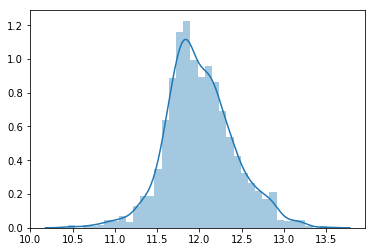

In [54]:
sns.distplot(KRR_final_preds)

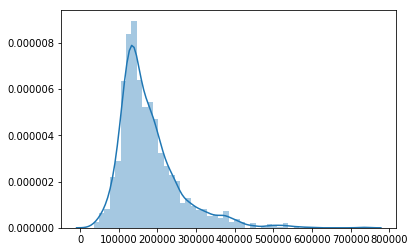

In [55]:
Final = np.expm1(KRR_final_preds)
sns.distplot(Final)

### Kernel Ridge with unscaled fitting and predicting

In [56]:
# Use Kernel Ridge model without scaling values
KRR2 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR2.fit(X_train,y)
KRR2_predictions = KRR2.predict(X_train)
KRR2_mse = mean_squared_error(y, KRR2_predictions)
print("RMSE: {}".format(np.sqrt(KRR_mse)))


RMSE: 0.057531248556298716


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


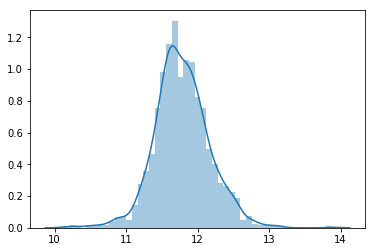

In [57]:
KRR2_final_preds = KRR2.predict(X_test)
sns.distplot(KRR2_final_preds)

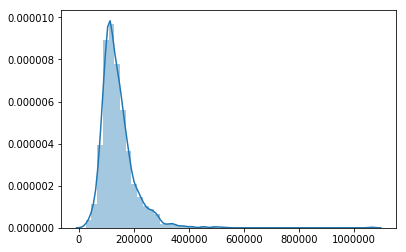

In [58]:
Final2 = np.expm1(KRR2_final_preds)
sns.distplot(Final2)

In [59]:
# submission from kernel ridge when I predict on unscaled data, #3733
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Final2
#sub.to_csv('submission.csv',index=False) # i commented it out so I wouldn't get this submission over and over

In [60]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = Final
#sub.to_csv('submission2.csv',index=False)

### Averaging 4 models

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(s

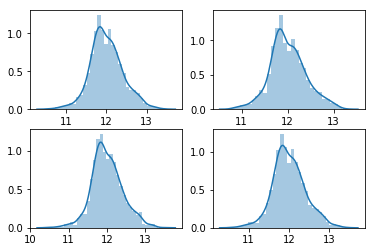

In [61]:
scaled_test = scaler.transform(X_test)
ave_preds = .25*ENet.predict(scaled_test) + .25*GBoost.predict(scaled_test) + .25*KRR.predict(scaled_test) + .25*lasso.predict(scaled_test)
#averaged_models4 = AveragingModels(models = (ENet, GBoost, KRR, lasso))
#averaged_models4.fit(scaled_df, y)
#ave_preds2 = averaged_models4.predict(X_test)
plt.subplot(221)
sns.distplot(ENet.predict(scaled_test))
plt.subplot(222)
sns.distplot(GBoost.predict(scaled_test))
plt.subplot(223)
sns.distplot(KRR.predict(scaled_test))
plt.subplot(224)
sns.distplot(lasso.predict(scaled_test))

ave_final = np.expm1(ave_preds)


In [62]:
# ENet, GBoost, KRR, lasso


sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = ave_final
#sub3.to_csv('submission3.csv',index=False)

### Averaging 3 models

In [63]:
scaled_test = scaler.transform(X_test)
ave_preds4 = .34*ENet.predict(scaled_test) + .33*GBoost.predict(scaled_test) + .33*lasso.predict(scaled_test)

ave_final4 = np.expm1(ave_preds4)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [64]:
sub4 = pd.DataFrame()
sub4['Id'] = test_ID
sub4['SalePrice'] = ave_final4
#sub4.to_csv('submission4.csv',index=False)

### XGBoost

In [65]:
scaled_test = scaler.transform(X_test)
XGB_preds = XGB.predict(scaled_test)
XGB_final = np.expm1(XGB_preds)
sub5 = pd.DataFrame()
sub5['Id'] = test_ID
sub5['SalePrice'] = XGB_final
#sub5.to_csv('submission5.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [66]:
# gridsearch cv go to acme.byu.edu senior labs, V3, intro to SKLearn
# n_jobs = -1

### Ensembling four models with xgboost

In [67]:
scaled_test = scaler.transform(X_test)
ave_preds = .25*ENet.predict(scaled_test) + .25*GBoost.predict(scaled_test) + .25*XGB.predict(scaled_test) + .25*lasso.predict(scaled_test)
ave_final4_xgb = np.expm1(ave_preds)
sub6 = pd.DataFrame()
sub6['Id'] = test_ID
sub6['SalePrice'] = ave_final4_xgb
#sub6.to_csv('submission6.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### XGBoost, LassoCV, and Elastic Net

In [68]:
scaled_test = scaler.transform(X_test)
ave_preds3 = .34*ENet.predict(scaled_test) + .33*XGB.predict(scaled_test) + .33*lasso.predict(scaled_test)

ave_final3 = np.expm1(ave_preds3)
sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = ave_final3
#sub3.to_csv('submission7.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Just lasso

In [81]:
scaled_test = scaler.transform(X_test)
lasso_preds = lasso.predict(scaled_test)
lasso_final = np.expm1(lasso_preds)
sub8 = pd.DataFrame()
sub8['Id'] = test_ID
sub8['SalePrice'] = lasso_final
sub8.to_csv('submission8.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### KRR, Random Forest, GBoost

In [99]:
#preds1 = .33*KRR_predictions + .34*Rando_predictions + .33*GBoost_predictions
scaled_test = scaler.transform(X_test)
ave_preds3 = .34*KRR.predict(scaled_test) + .33*Rando.predict(scaled_test) + .33*GBoost.predict(scaled_test)

ave_final3 = np.expm1(ave_preds3)
sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = ave_final3
sub3.to_csv('submission9.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### .7 lasso and .3 xgb

In [101]:
scaled_test = scaler.transform(X_test)
ave_preds3 = .7*lasso.predict(scaled_test) + .3*XGB.predict(scaled_test)

ave_final3 = np.expm1(ave_preds3)
sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = ave_final3
sub3.to_csv('submission10.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Extra Trees Regressor

In [108]:
scaled_test = scaler.transform(X_test)
extra_preds = extra_model.predict(scaled_test)
extra_final = np.expm1(extra_preds)
sub8 = pd.DataFrame()
sub8['Id'] = test_ID
sub8['SalePrice'] = extra_final
sub8.to_csv('submission11.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [115]:
averaged_models_4 = AveragingModels(models = (ENet, GBoost, KRR, lasso))
averaged_models_4.fit(scaled_df,y)

scaled_test = scaler.transform(X_test)
ave_preds3 = .7*averaged_models_4.predict(scaled_test) + .3*XGB.predict(scaled_test)

ave_final3 = np.expm1(ave_preds3)
sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = ave_final3
sub3.to_csv('submission12.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [116]:
averaged_models_3 = AveragingModels(models = (ENet, GBoost, lasso))
averaged_models_3.fit(scaled_df,y)

scaled_test = scaler.transform(X_test)
ave_preds3 = .7*averaged_models_3.predict(scaled_test) + .3*XGB.predict(scaled_test)

ave_final3 = np.expm1(ave_preds3)
sub3 = pd.DataFrame()
sub3['Id'] = test_ID
sub3['SalePrice'] = ave_final3
sub3.to_csv('submission13.csv',index=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Final words about process

In the end, my best model was that of ensembling 3 models; Gradient Boost, Lasso, and Elastic Net. 

averaged_models_3 = AveragingModels(models = (ENet, GBoost, lasso))
ave_preds3 = .7*averaged_models_4.predict(scaled_test) + .3*XGB.predict(scaled_test)

To get here I tried a bunch of models and tested each of their mean squared errors. From there I was able to find my four best performing models and try them out. I tested these models using a function I got from someone else's kernel on Kaggle, form there I actually noticed that dropping off the kernel ridge improved my model. I think it was due to kernel ridge overfitting and my other being more modest in their fit. What I am not good at and need to work on for next time is plotting the overfit and seeing where the problem is. We went over this in class but I didn't get how to actually code it up. So that would be the following thing I need to get good at.

One initial problem with my model is that Elastic Net makes the assumption of linear coefficients on each feature. But this is msot liekly not the case for almost all of those features. There very well could be a hyperbolic relationship for most of the coefficients.

I think this would be a fairly good model as it did a pretty good job predicting home prices. If I had some more time I do believe I could get a better score but for the amount of time I put into this I did quite well with averaging 4 models and ensembling those with another.